In [1]:
import pandas as pd
from scipy import stats
import scipy
import numpy as np
from statsmodels.stats.proportion import proportion_confint

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



### Значения переменных в таблице

>LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)
>
>SEX: пол клиента (1 = мужской, 2 = женский )
>
>EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).
>
>MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).
>
>AGE: возраст в годах
>
>PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 = исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)
>
>BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь
>
>PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре
>
>default - индикатор невозврата денежных средств

In [3]:
credits_data = pd.read_csv('credit_card_default_analysis.csv').drop('ID', axis = 1)

In [4]:
credits_data.shape

(30000, 24)

In [5]:
credits_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
credits_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Задания. 

### Задание 1. 

#### <i>Размер кредитного лимита (LIMIT_BAL).</i> 

В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: 
 <li>a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки</li> <li>b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средни.</li> 
 
 Значимы ли полученные результаты с практической точки зрения ?

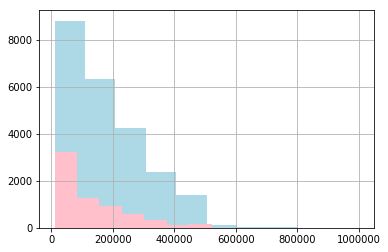

In [7]:
lim_bal_refund = credits_data.loc[credits_data.default == 0].LIMIT_BAL
lim_bal_debt = credits_data.loc[credits_data.default == 1].LIMIT_BAL

lim_bal_refund.hist(color = 'lightblue')
lim_bal_debt.hist(color = 'pink')

##### Проверка гипотезы о равенстве медианных значений.

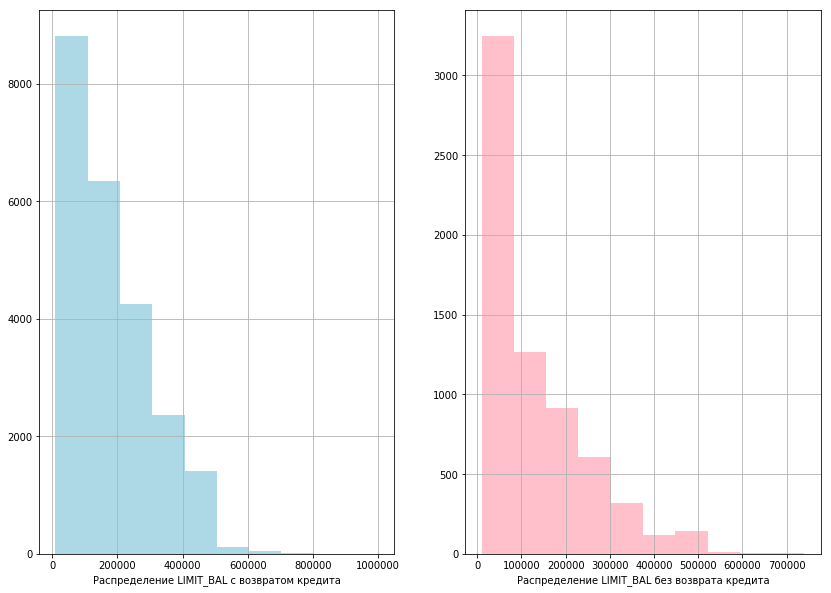

In [8]:
pylab.figure(figsize=(14, 10))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(lim_bal_refund, color = 'lightblue')
pylab.xlabel('Распределение LIMIT_BAL с возвратом кредита')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(lim_bal_debt, color = 'pink')
pylab.xlabel('Распределение LIMIT_BAL без возврата кредита')

pylab.show()

Так как нам ничего не известно про статистику, которую мы будем оценивать, воспользуемся методом бутстрапа.

In [9]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [10]:
medians_refund_bootstrap = list(map(np.median, get_bootstrap_samples(lim_bal_refund.values, 1000)))
medians_debt_bootstrap = list(map(np.median, get_bootstrap_samples(lim_bal_debt.values, 1000)))

print ("95% confidence interval for the LIMIT_BAL median for REFUND(default = 0):",  stat_intervals(medians_refund_bootstrap, 0.05))
print ("95% confidence interval for the LIMIT_BAL median for DEBT(default = 1):",  stat_intervals(medians_debt_bootstrap, 0.05))

delta_median_scores = list(map(lambda x: x[1] - x[0], zip(medians_refund_bootstrap, medians_debt_bootstrap)))

print ("95% confidence interval for the median between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the LIMIT_BAL median for REFUND(default = 0): [ 150000.  150000.]
95% confidence interval for the LIMIT_BAL median for DEBT(default = 1): [ 80000.  90000.]
95% confidence interval for the median between medians [-70000. -60000.]


Видно, что доверительные интервалы не перескаются, и отстоят друг от друга на значительном расстоянии. В доверительный интервал разности медиан ноль не входит. С легкостью можем отвергнуть гипотезу о равенстве медиан. 

##### Проверка гипотезы о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних.


Так как наши выборки независимые: клиенты разные, одни вернули кредит, а другие, не вернули, то можем использовать критерий Манна-Уитни для независимых выборок. 

In [11]:
stats.mannwhitneyu(lim_bal_refund, lim_bal_debt)

MannwhitneyuResult(statistic=59257217.5, pvalue=6.1277429091116516e-190)

Гипотезу о равенстве распределений на уровне значимости $\alpha = 0.05$ отвергаем, так как полученный p-value << 0.05 
Гипотеза Н1 - двухстороняя гипотеза о неравенстве. 

##### Практическая значимость

Особой практической значимости не наблюдается. Разве что, статистически доказаны и так достаточно логические выводы: 

Кредитный лимит тех, кто вернул, в среднем, больше, чем у тех, кто не вернул. Что доказано тем фактом, что люди с хорошей кредитной историей более отвественны и возвращают деньги намного чаще. 

### Задание 2. 

#### <i>Пол (SEX).</i> 

Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. 
Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего 
                                                                      статистического критерия)

In [12]:
# 0 - м
# 1 - ж
sex_refund = credits_data.loc[credits_data.default == 0].SEX-1
sex_refund.value_counts()

1    14349
0     9015
Name: SEX, dtype: int64

In [13]:
# 0 - м
# 1 - ж
sex_debt = credits_data.loc[credits_data.default == 1].SEX-1
sex_debt.value_counts()

1    3763
0    2873
Name: SEX, dtype: int64

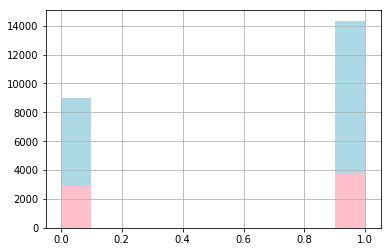

In [14]:
# 0 - м
# 1 - ж
sex_refund.hist(color = 'lightblue')
sex_debt.hist(color = 'pink')

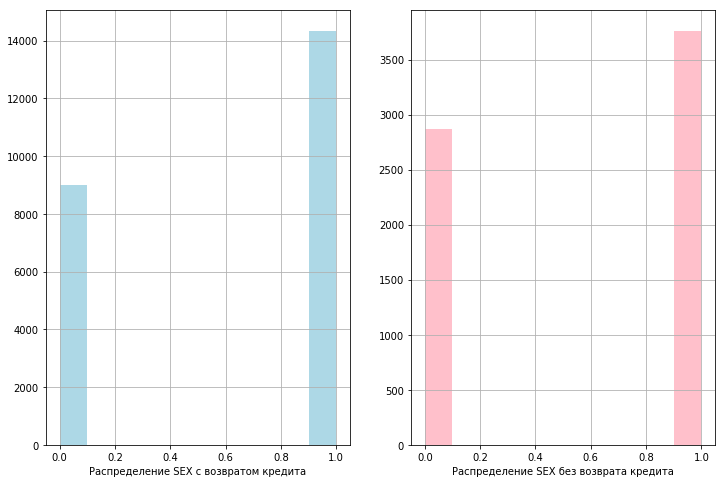

In [15]:
pylab.figure(figsize=(12, 8))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(sex_refund, color = 'lightblue')
pylab.xlabel('Распределение SEX с возвратом кредита')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(sex_debt, color = 'pink')
pylab.xlabel('Распределение SEX без возврата кредита')

pylab.show()

Пол - бинарный признак. Будем делать проверку по соотношению долей в двух независимых выборках. 

По графикам видно, что в обоих случаях чаще кредиты берут женщины. И в случае возврата кредита, в долевом соотношении это еще заметнее. 

In [16]:
conf_interval_sex_refund = proportion_confint(sum(sex_refund), 
                                            len(sex_refund),
                                            method = 'wilson')
conf_interval_sex_debt = proportion_confint(sum(sex_debt), 
                                            len(sex_debt),
                                            method = 'wilson')

print ('Interval for woman in refund group [%f, %f]' % conf_interval_sex_refund)
print ('Interval for woman in  debt group [%f, %f]' % conf_interval_sex_debt)

Interval for woman in refund group [0.607890, 0.620373]
Interval for woman in  debt group [0.555102, 0.578938]


In [17]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

confint = proportions_diff_confint_ind(sex_refund, sex_debt, alpha = 0.05)

print ("Confidence interval for woman in diff of groups: [%f, %f]" % confint)

Confidence interval for woman in diff of groups: [0.033635, 0.060548]


In [18]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)
    
print ("p-value:", proportions_diff_z_test(proportions_diff_z_stat_ind(sex_refund, sex_debt), alternative = "greater"))

p-value: 2.2364332608e-12


Гипотезу о равенстве долей на уровне значимости $\alpha = 0.05$ отвергаем, так как полученный p-value << 0.05 
Гипотеза Н1 - односторонняя гипотеза о неравенстве больше. Т.е. из гипотезы следуют, что в долевом соотношении вернувших, женщин больше, чем в долевом соотношении не вернувших.

##### Практическая значимость

Можно сделать вывод, что девушки чаще возвращают кредит по сравнению с мужчинами. 

### Задание 3. 

#### <i>Образование (EDUCATION).</i>

Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. 

Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек.

Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [19]:
EDUCATION_table = pd.crosstab(credits_data.EDUCATION, credits_data.default)
EDUCATION_table

default,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


Построили таблицу сопряженности. 
Так как величины категориальные, будем смотреть на критерий хи-квадрат. Гипотеза H0 - гипотеза о независимости(в данном случае, некоррелируемости) переменных EDUCATION и default.

In [20]:
chi2, p_value, dof, expected_table = stats.chi2_contingency(EDUCATION_table)
p_value

1.2332626245415605e-32

Гипотезу H0 о некоррелируемости на уровне значимости $\alpha = 0.05$ отвергаем, так как полученный p-value << 0.05 
Значит, существует зависимость между образованием и возвратом/невозвратом кредита.


Построим таблицу различий между ожидаемыми и наблюдаемыми значениями в таблице сопряженности(с помощью разности этих значений).

In [21]:
diff_table_education = pd.DataFrame(expected_table - EDUCATION_table, dtype='int')

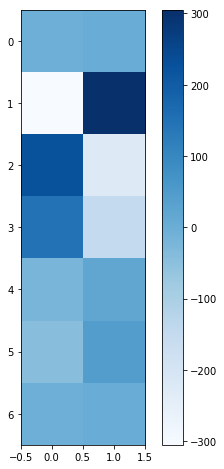

In [22]:
plt.figure(figsize = (6, 8))
plt.imshow(diff_table_education, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? В принципе, можно просто нормировать. 

Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

In [23]:
PART_TABLE =EDUCATION_table[0] / np.sum(EDUCATION_table, axis = 1 )

In [24]:
PART_TABLE.sort_values(ascending = False)

EDUCATION
0    1.000000
4    0.943089
5    0.935714
6    0.843137
1    0.807652
2    0.762651
3    0.748424
dtype: float64

По таблице видно, что доля людей, имеющих мед. образование, вернула все кредиты. Соответственно, эт наилучший индикатор возвращения кредита. 

Лучшим индикатором невозврата долга будет уровень образования 3 - выпускник школы. 

### Задание 4. 

#### <i>Семейное положение (MARRIAGE).</i>

Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

In [25]:
MARRIGE_table = pd.crosstab(credits_data.MARRIAGE, credits_data.default)
MARRIGE_table

default,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


Признак MARRIAGE является категориальным. А default бинарным, снова воспользуемся критерием хи-квадрат.

In [26]:
chi2, p_value, dof, expected_table = stats.chi2_contingency(MARRIGE_table)

In [27]:
p_value 

8.8258624575773752e-08

Гипотезу H0 о некоррелируемости на уровне значимости $\alpha = 0.05$ отвергаем, так как полученный p-value << 0.05 
Значит, существует зависимость между семейным положением и возвратом/невозвратом кредита.

В качестве меры корреляции используем коэффициент V-Крамера, который изменяется в границах [0,1]
0, как и раньше, соответствует полному отсутствию взаимосвязи, а 1 — полному совпадению
переменных с точностью до переименования уровней. 

In [28]:
def cramer_coff(conf_matr):
    chi2, p_value, dof, expected_table = stats.chi2_contingency(conf_matr)
    n = conf_matr.sum().sum()
    return np.sqrt(chi2 / (n*(min(conf_matr.shape)-1)))

In [29]:
cramer_coff(MARRIGE_table)

0.034478203662766466

Полученный коэффициент корреляции очень низкий. Возможно, это связано с тем, что существуют, хоть и не в значительной мере, данные, для которых семейное положение == 0 или == 3, т.е. неоднозначное. К тому же, неясно, каково долевое соотношение. К тому же, вполне вероятно, что взаимосвязь если и есть, то очень слабая. 

Удачным вариантом для проверки будет удаление данных с неоднозначным семейным положением и проверка на долевое соотношение между оставшимися двумя признаками. 

### Задание 5. 

#### <i>Возраст (AGE).</i>

Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: <li>a) о равенстве медианных значений возрастов людей</li> <li> b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?</li>

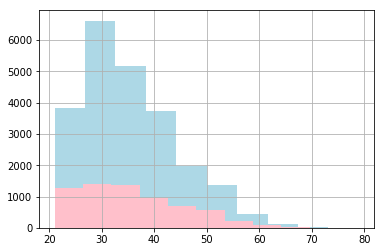

In [30]:
age_refund = credits_data.loc[credits_data.default == 0].AGE
age_debt = credits_data.loc[credits_data.default == 1].AGE

age_refund.hist(color = 'lightblue')
age_debt.hist(color = 'pink')

Так как нам ничего не известно про статистику, которую мы будем оценивать, воспользуемся методом бутстрапа.

In [31]:
age_refund_median_scores = list(map(np.median, get_bootstrap_samples(age_refund.values, 1000)))
age_debt_median_scores = list(map(np.median, get_bootstrap_samples(age_debt.values, 1000)))
delta_scores = list(map(lambda x: x[1] - x[0], zip(age_refund_median_scores, age_debt_median_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_scores, 0.05))

95% confidence interval for the difference between medians [ 0.  1.]


In [32]:
stat_intervals(age_refund_median_scores,0.05)

array([ 34.,  34.])

In [33]:
stat_intervals(age_debt_median_scores,0.05)

array([ 34.,  35.])

Доверительный интервал для разности медиан содержит ноль, гипотезу о равенстве медиан отвергнуть нельзя. Сказать, что медианы значимо отличаются на уровне доверия 0.05 не можем.

C помощью перестановочного критерия для независимых выборок проверим гипотезу о равенстве распределений. 

In [34]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [35]:
print("p-value: %f" % permutation_test(age_refund.values, age_debt.values, max_permutations = 1000))

p-value: 0.016000


На уровне значимости 0.05 гипотеза о равенстве средних отклоняется. 

Практическая значимость минимальная. Средний возраст двух групп особо не отличается, т.к. разность доверительных интервалов не превышает 1. 